<Axes: xlabel='Year'>

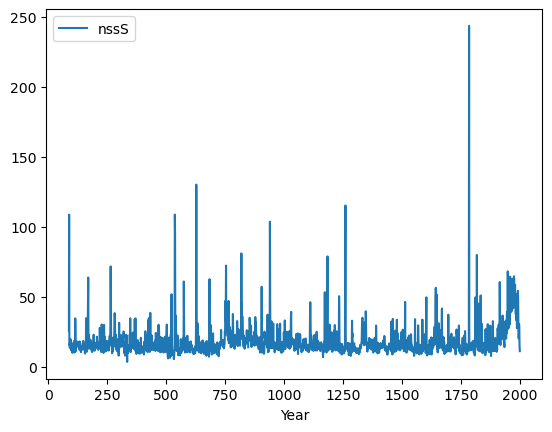

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ant_ice = pd.read_csv('antarctic ice cores.xlsx', encoding='unicode_escape')
neem_ice = pd.read_csv('dallas/NEEM_2011_S1_annual_nssS.csv').rename(columns={'NEEM(2011-S1) combined (ppb)': 'nssS'}).set_index('Year')

# neem_ice = neem_ice.drop([neem_ice.columns[i] for i in range(7,11)], axis=1).dropna()
neem_ice = neem_ice[['nssS']].dropna()
neem_ice[neem_ice['nssS']<0] = np.nan
# neem_ice
# neem_ice=neem_ice.drop(columns=['NEEM-2011-S1 Depth_m', 'NEEM-2011-S1 (Depth_mweq)', 'NEEM-2011-S1 nssS (ppb) DRI',
#                        'NEEM S (ppb) BAS', 'Dataset (ice core/analysis) used for reconstruction']).set_index('Year')
# neem_ice = neem_ice.rename(columns={'NEEM(2011-S1) combined (ppb)': 'nssS'})
neem_ice.plot()
# plt.plot(neem_ice['Year'], neem_ice['NEEM(2011-S1) combined (ppb)'] - np.mean(neem_ice['NEEM(2011-S1) combined (ppb)']))
# plt.xlim(1800,2000)

<Axes: xlabel='Year'>

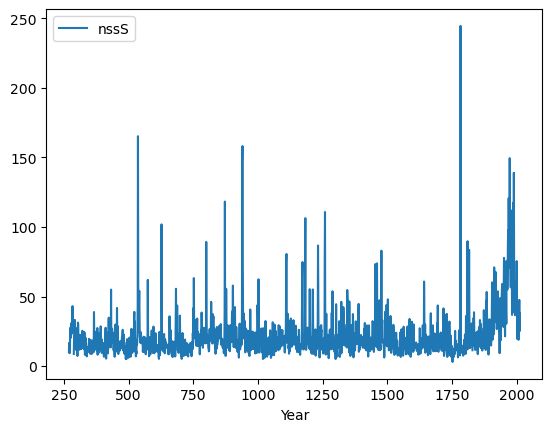

In [65]:
tunu_ice = pd.read_csv('dallas/Tunu2013annual_nssS.csv')
tunu_ice = tunu_ice.drop(columns=['Depth_m', 'Depth_mweq']).rename(columns={'nssS_(ng/g)': 'nssS', 'NS1_2011_Year': 'Year'}).set_index('Year')
tunu_ice[tunu_ice['nssS']<0] = np.nan
tunu_ice.plot()

<Axes: xlabel='Year'>

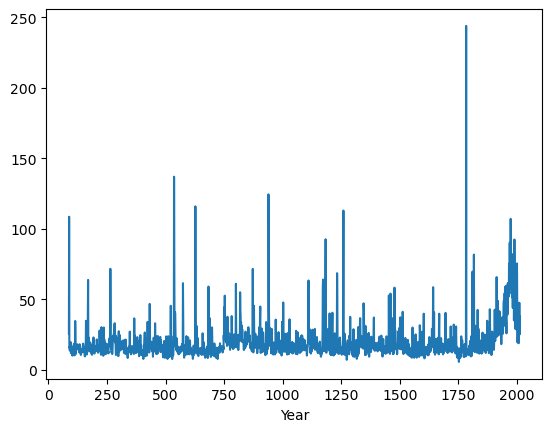

In [66]:
neem_tunu_ice = pd.concat((neem_ice, tunu_ice), axis=1).mean(axis=1).sort_index()
neem_tunu_ice.plot()

<Axes: xlabel='Year'>

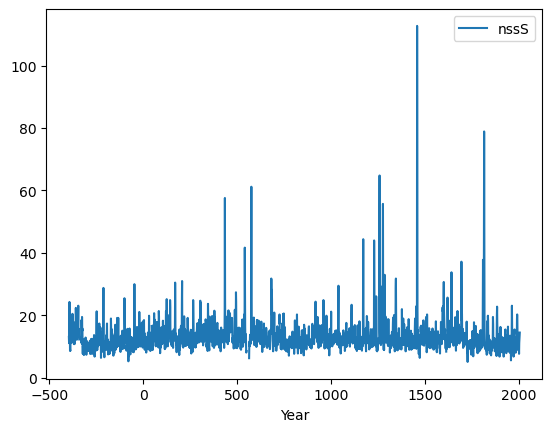

In [67]:
wdc_ice = pd.read_csv('dallas/WDC06A_annual_nssS.csv').rename(columns={'Mid_Year_WD2014': 'Year',
                                                                      'nssS_(ng/g)': 'nssS'}).set_index('Year')
wdc_ice = wdc_ice[['nssS']]
wdc_ice[wdc_ice['nssS']<0] = np.nan
wdc_ice.plot()

<Axes: xlabel='Year'>

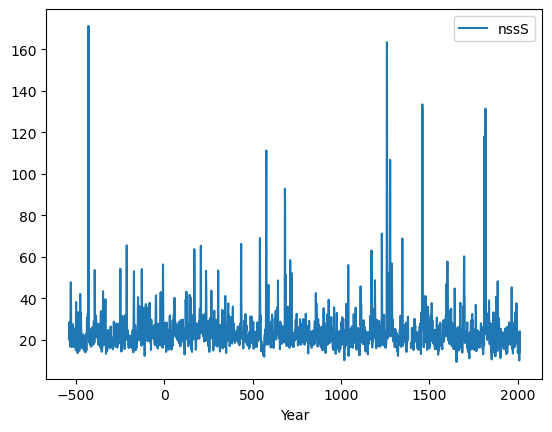

In [68]:
b40_ice = pd.read_csv('dallas/B40_annual_nssS.csv').rename(columns={'Mid_Year_WD2014': 'Year',
                                                                      'nssS_(ng/g)': 'nssS'}).set_index('Year')
b40_ice = b40_ice[['nssS']]
b40_ice[b40_ice['nssS']<0] = np.nan
b40_ice.plot()

<Axes: xlabel='Year'>

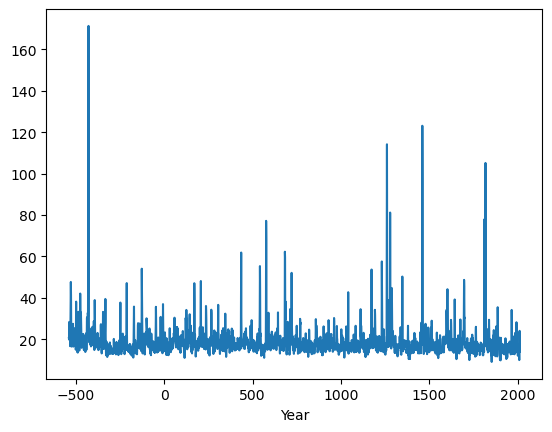

In [69]:
wdc_b40_ice = pd.concat((wdc_ice, b40_ice), axis=1).mean(axis=1).sort_index()
wdc_b40_ice.plot()

<Axes: xlabel='Year'>

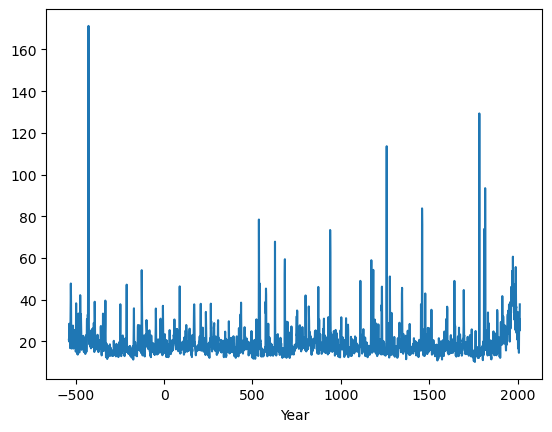

In [70]:
all_ice = pd.concat((neem_ice, tunu_ice, wdc_ice, b40_ice), axis=1).mean(axis=1).sort_index()
all_ice.plot()

In [129]:
np.mean(all_ice)

19.31976880877743

In [71]:
frost_rings = pd.read_csv('dallas/Frost_Ring_Dates_Sept_27.csv')
frost_rings

,Year_Frost,Mean_Age,Age_Error,Reference,Region,Latitude,Longitude,Unnamed: 7
0,1997,1997.5095,0.0415,Hantemirov_2004,Siberia,67.833333,65.766667,NaN
1,1996,1996.5095,0.0415,Hantemirov_2004,Siberia,67.833333,65.766667,NaN
2,1992,1992.5095,0.0415,Hantemirov_2004,Siberia,67.833333,65.766667,NaN
3,1989,1989.5095,0.0425,Panayotov_and_Yurukov_2007,Bulgaria_Pirin_Mts,41.750000,3.433333,NaN
4,1980,1980.5095,0.0415,Hantemirov_2004,Siberia,67.833333,65.766667,NaN
...,...,...,...,...,...,...,...,...
389,-2731,-2730.3970,0.1260,Salzer_Hughes_2007,Western_US,38.000000,-116.000000,NaN
390,-2732,-2731.3970,0.1260,Salzer_Hughes_2007,Western_US,38.000000,-116.000000,NaN
391,-2841,-2840.3970,0.1260,Salzer_Hughes_2007,Western_US,38.000000,-116.000000,NaN
392,-2905,-2904.3970,0.1260,Salzer_Hughes_2007,Western_US,38.000000,-116.000000,NaN


C:\Users\aspen\AppData\Local\Temp\ipykernel_19272\3204983569.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ipo = pd.read_csv('dallas/IPO-longRecon.txt', header=None, delimiter='   ', names=['Year', 'IPO']).set_index('Year')


<Axes: xlabel='Year'>

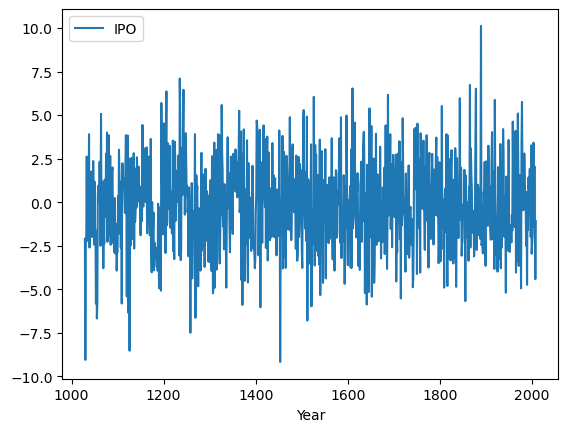

In [72]:
ipo = pd.read_csv('dallas/IPO-longRecon.txt', header=None, delimiter='   ', names=['Year', 'IPO']).set_index('Year')
ipo.plot()

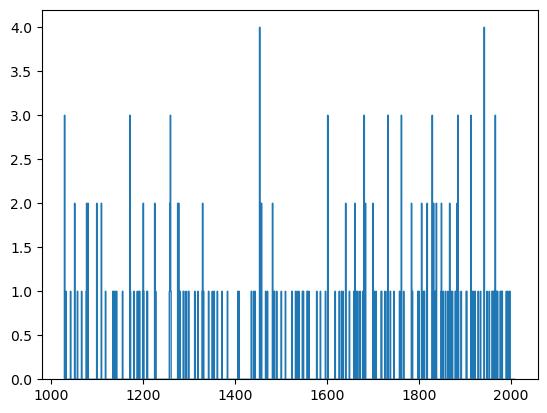

In [23]:
counts, bins = np.histogram(frost_rings['Year_Frost'], bins=np.arange(1029,2010,1))
plt.stairs(counts, bins)

(1870.0, 2010.0)

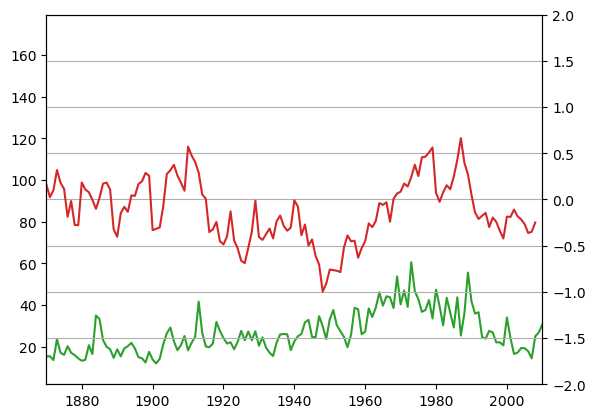

In [215]:
fig, ax1 = plt.subplots()

# ax1.hist(frost_rings['Year_Frost'], bins=2000)
# ax1.bar(counts, bins)
# ax1.bar(bins[:-1], counts, width=1)

# ax2 = ax1.twinx()
ax1.plot(all_ice.index - 0.5, all_ice, c='tab:green')
# ax1.set_ylim(10,50)

ax3 = ax1.twinx()
# ax3.plot(ipo.index, ipo['IPO'], c='tab:red')
# ax3.set_ylim(-6,6)
ax3.plot(ipo.index, np.convolve(ipo['IPO'], np.ones(20)/20, mode='same'), c='tab:red')
ax3.set_ylim(-2,2)



plt.grid()

plt.xlim(1870,2010)

In [176]:
ipo

,IPO
Year,
1029,-2.099
1030,-9.057
1031,-2.430
1032,-2.041
1033,2.618
...,...
2004,-1.417
2005,2.072
2006,-0.910


In [89]:
all_ice.loc[1029.5:2008.5]

Year
1029.5    31.050000
1030.5    18.475000
1031.5    15.950000
1032.5    15.700000
1033.5    14.625000
            ...    
2004.5    19.400000
2005.5    19.333333
2006.5    17.900000
2007.5    14.450000
2008.5    25.000000
Length: 980, dtype: float64

In [90]:
ipo['IPO']

Year
1029   -2.099
1030   -9.057
1031   -2.430
1032   -2.041
1033    2.618
        ...  
2004   -1.417
2005    2.072
2006   -0.910
2007   -4.419
2008   -1.086
Name: IPO, Length: 980, dtype: float64

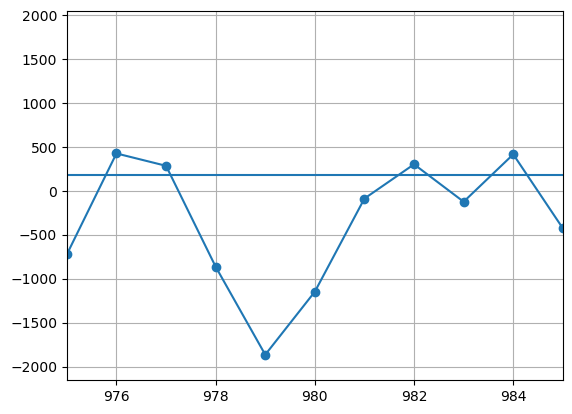

In [213]:
corr = np.correlate(all_ice.loc[1030.5:2009.5]-np.mean(all_ice.loc[1030.5:2009.5]), ipo['IPO']-np.mean(ipo['IPO']), 'full')
plt.plot(corr, 'o-')
plt.grid()
plt.xlim(975, 985)
plt.axhline(185)

In [130]:
np.mean(all_ice.loc[icemin:icemax])

19.685960884353744

In [211]:
ipo['IPO']

Year
1029   -2.099
1030   -9.057
1031   -2.430
1032   -2.041
1033    2.618
        ...  
2004   -1.417
2005    2.072
2006   -0.910
2007   -4.419
2008   -1.086
Name: IPO, Length: 980, dtype: float64

(-10.0, 10.0)

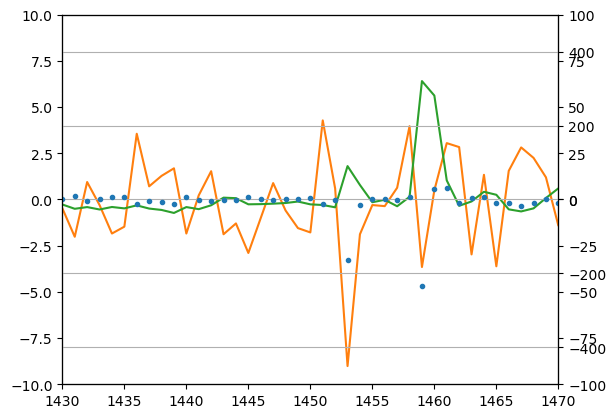

In [231]:
fig, ax1 = plt.subplots()

shift=0
icemin = 1029.5+shift
icemax = 2008.5+shift

icenorm = all_ice.loc[icemin:icemax]-np.mean(all_ice.loc[icemin:icemax])
iponorm = ipo['IPO']-np.mean(ipo['IPO'])

ax1.plot(iponorm.index, iponorm, c='tab:orange')

ax2 = ax1.twinx()
ax2.plot(icenorm.index-0.5-shift, icenorm, c='tab:green')

ax3 = ax1.twinx()
ax3.plot(icenorm.index-0.5-shift, icenorm.values*iponorm.values, 'o', c='tab:blue', markersize=3)

plt.grid()
plt.xlim(1430,1470)
ax3.set_ylim(-500,500)
ax2.set_ylim(-100,100)
ax1.set_ylim(-10,10)

In [155]:
iponorm

Year
1029   -1.93923
1030   -8.89723
1031   -2.27023
1032   -1.88123
1033    2.77777
         ...   
2004   -1.25723
2005    2.23177
2006   -0.75023
2007   -4.25923
2008   -0.92623
Name: IPO, Length: 980, dtype: float64

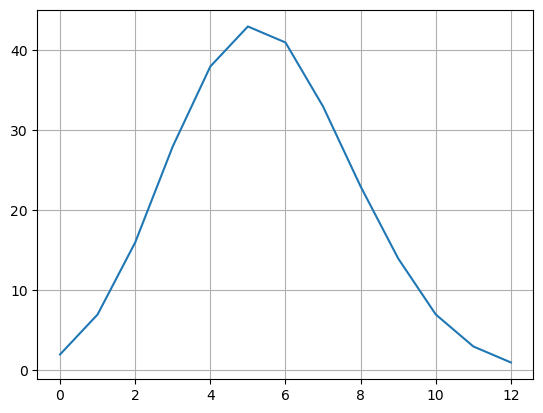

In [74]:
a = [1,2,3,4,3,2,1]
b = [1,1,2,3,4,3,2]
plt.plot(np.correlate(a,b,'full'))
plt.grid()

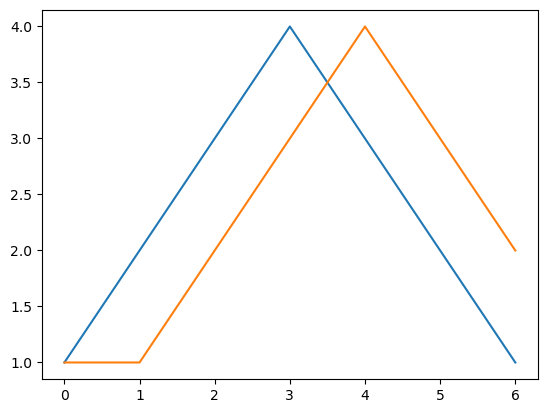

In [82]:
plt.plot(a)
plt.plot(b)

In [81]:
sum(np.array(a)*np.array(b))

41

In [83]:
np.correlate(a,b)

array([41])

In [75]:
5-(len(a)-1)

-1

(1900.0, 1940.0)

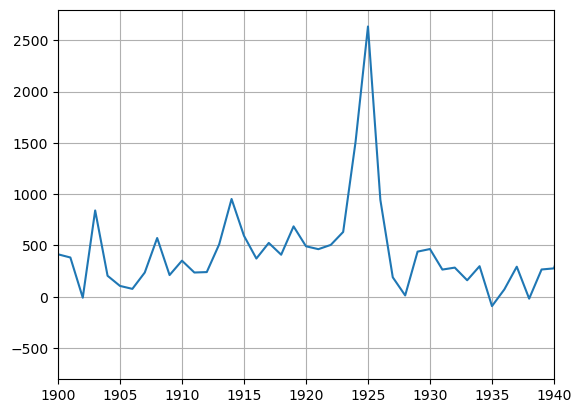

In [206]:
corr = np.correlate(counts-np.mean(counts), neem_tunu_ice-np.mean(neem_tunu_ice), 'full')
plt.plot(corr)
plt.grid()
# plt.xlim(1880, 1930)
# plt.xlim(650,680)
plt.xlim(1900,1940)

(800.0, 1300.0)

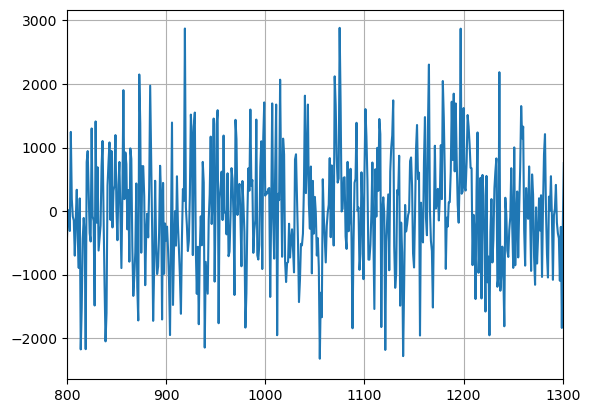

In [233]:
corr = np.correlate(neem_tunu_ice[1029:2009]-np.mean(neem_tunu_ice[1029:2009]), ipo['IPO']-np.mean(ipo['IPO']), 'full')
plt.plot(corr)
plt.grid()
# plt.xlim(1880, 1930)
# plt.xlim(650,680)
plt.xlim(800,1300)

In [194]:
np.correlate(counts-np.mean(counts), neem_tunu_ice-np.mean(neem_tunu_ice))

array([2623.74713084])

In [221]:
counts.shape

(980,)

In [159]:
ngrip_ice = pd.read_csv('dallas/NGRIP_5cm_discrete.csv')
ngrip_ice
# ngrip_ice = ngrip_ice.drop([ngrip_ice.columns[i] for i in range(7,11)], axis=1).dropna()

# plt.plot(ngrip_ice['Year'], ngrip_ice['NEEM(2011-S1) combined (ppb)'] - np.mean(ngrip_ice['NEEM(2011-S1) combined (ppb)']))

,Year (NS1-2011),NGRIP Depth (m),S (ppb),Year (GICC05)
0,1999.083,1.30,42.4,1999.083
1,1998.983,1.35,13.1,1998.983
2,1998.883,1.40,25.8,1998.883
3,1998.783,1.45,13.3,1998.783
4,1998.683,1.50,21.6,1998.683
...,...,...,...,...
7005,191.269,349.60,13.8,188.226
7006,190.952,349.65,13.8,187.916
7007,190.634,349.70,8.6,187.583
7008,190.317,349.75,16.6,187.250


In [212]:
ipo['IPO']

Year
1029   -2.099
1030   -9.057
1031   -2.430
1032   -2.041
1033    2.618
        ...  
2004   -1.417
2005    2.072
2006   -0.910
2007   -4.419
2008   -1.086
Name: IPO, Length: 980, dtype: float64

In [225]:
neem_tunu_ice[1029:2009]

Year
1029.5    35.85
1030.5    17.55
1031.5    13.95
1032.5    15.45
1033.5    14.60
          ...  
2004.5    30.80
2005.5    28.50
2006.5    23.30
2007.5    18.90
2008.5    26.70
Length: 980, dtype: float64

In [197]:
1925 - (len(counts) - 1)

0

In [69]:
from scipy.signal import correlate
from scipy.signal import correlation_lags

x = np.asarray([1,2,3,4])
y = np.asarray([.5,1,2,3])
lags = correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
print(lag)

NameError: name 'correlation' is not defined

In [66]:
counts.shape

(1912,)

In [60]:
bins

array([  87,   88,   89, ..., 1996, 1997, 1998])

In [57]:
np.array(neem_ice['Year'] - 0.5).shape

(1912,)

In [44]:
neem_ice

,Year,NEEM-2011-S1 Depth_m,NEEM-2011-S1 (Depth_mweq),NEEM-2011-S1 nssS (ppb) DRI,NEEM S (ppb) BAS,NEEM(2011-S1) combined (ppb),Dataset (ice core/analysis) used for reconstruction
0,1998.5,5.36,2.32,11.3,-9.999,11.3,NEEM-2011-S1/DRI
1,1997.5,6.01,2.60,14.7,-9.999,14.7,NEEM-2011-S1/DRI
2,1996.5,6.52,2.83,26.4,-9.999,26.4,NEEM-2011-S1/DRI
3,1995.5,6.99,3.06,30.5,-9.999,30.5,NEEM-2011-S1/DRI
4,1994.5,7.42,3.26,21.9,-9.999,21.9,NEEM-2011-S1/DRI
...,...,...,...,...,...,...,...
1907,91.5,409.89,354.20,13.7,-9.999,13.7,NEEM-2011-S1/DRI
1908,90.5,410.09,354.38,16.3,-9.999,16.3,NEEM-2011-S1/DRI
1909,89.5,410.30,354.58,15.7,-9.999,15.7,NEEM-2011-S1/DRI
1910,88.5,410.53,354.79,108.6,-9.999,108.6,NEEM-2011-S1/DRI


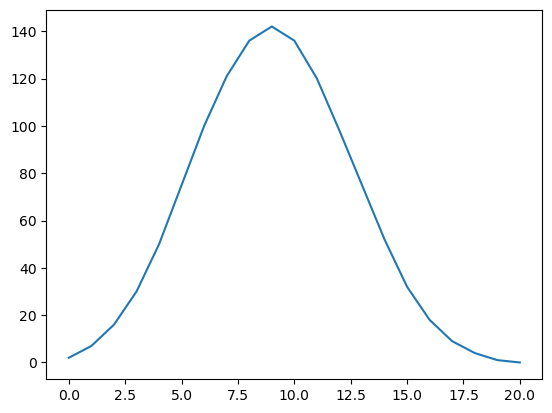

In [52]:
a = [1,2,3,4,5,6,5,4,3,2,1]
b = [0,1,2,2,4,5,6,5,4,3,2]
plt.plot(np.correlate(a,b,'full'))

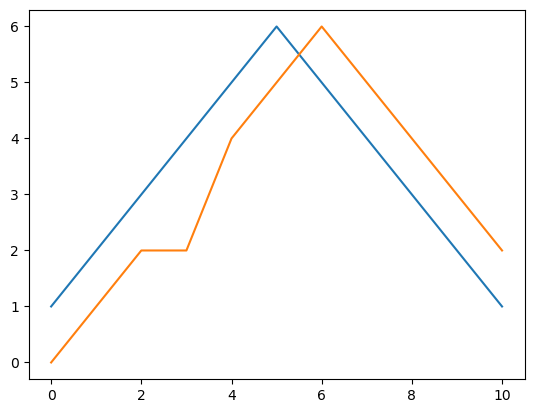

In [53]:
plt.plot(a)
plt.plot(b)